In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [2]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

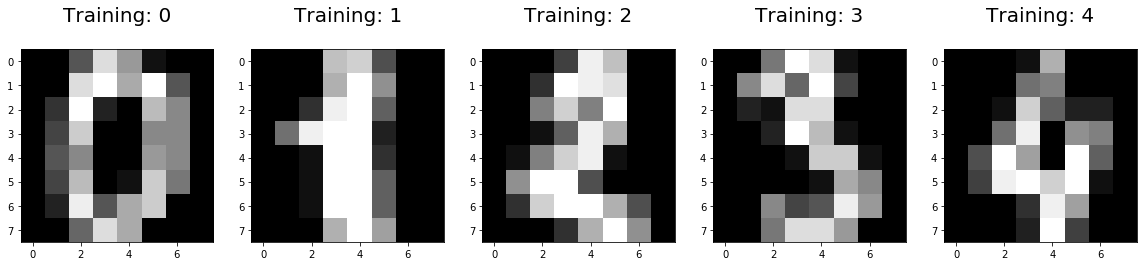

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [5]:
# 3.2 batch gradient descent (GD) for Logistic regression
def get_loss(W,X,y,eta):
    
    num_train,dim = X.shape
    loss = 0
    for i in range(num_train):
        x = X[i]
        scores = x@W
        scores -= np.max(scores)
        correct_class_score = scores[y[i]]
        sum_exp_scores = np.sum(np.exp(scores))
        correct_class_exp_score = np.exp(correct_class_score)
        loss = loss - np.log(correct_class_exp_score/sum_exp_scores)
        
    loss = loss/num_train
    loss = loss + eta*0.5*np.sum(W*W) #adding the forbenius norm regularization term
    
    return loss

def get_grad(W,X,y,eta):
    num_train,dim = X.shape
    grad = np.zeros((W.shape[0], W.shape[1]))
    
    for i in range(num_train):
        x = X[i]
        scores = x@W
        scores -= np.max(scores)
        sum_exp_scores = np.sum(np.exp(scores))
        exp_scores = np.exp(scores)
        factors = exp_scores/sum_exp_scores
        
        for j in range(10): #num classes
            grad[:,j] += factors[j]*x.T
            
        
        grad[:,y[i]] -=x.T # Adding the additional term in the correct class gradient
        
    
    grad = grad/num_train
    grad = grad + eta*W #adding the term from regularization
    
    return grad


def get_loss_grad_opt(W,X,y,eta):
    

    num_train,dim = X.shape
    
    scores = np.dot(X,W) #Nx10
    scores -= np.max(scores)
    
    exp_scores = np.exp(scores) #Nx10
    sum_exp_scores = np.sum(exp_scores,axis=1) #Nx1
    correct_class_exp_score = exp_scores[range(num_train),y] #N
    
    loss =   -1*np.log(correct_class_exp_score/sum_exp_scores) #N
    loss = np.sum(loss)
    
    loss = loss/num_train
    loss = loss + eta*0.5*np.sum(W*W) #adding the forbenius norm regularization term

    #gradient calculation
    exp_scores_T = exp_scores.T #10XN
    factors = exp_scores_T/sum_exp_scores  #10/N
    
    #Additional -1 term for the correct class
    #Select the correct class from each column in factors
    factors[y,range(num_train)] -= 1 
    #grad = np.dot(factors,X)
    grad = np.dot(X.T, factors.T)
    
    grad = grad/num_train
    grad = grad + eta*W #adding the term from regularization
    
    
    return loss, grad


def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    eta = 0.1
    
    #Initilaize W to some random value
    W = np.random.randn(X_train.shape[1],10)
    loss = []
    
    loss_prev = 0
    while True:
        #loss_curr = get_loss(W,X_train,y_train,eta)
        #grad = get_grad(W,X_train,y_train,eta)
        
        loss_curr, grad = get_loss_grad_opt(W,X_train,y_train,eta)
        W -= learning_rate*grad
        
        if(np.abs(loss_prev-loss_curr) <= 0.0001):
            break
        
        loss_prev = loss_curr
        loss.append(loss_curr)
        
    
    b = W[0,:]
    W = np.delete(W,0,0)    
    
    return W, b, loss


---------------------------------------
learning rate = 0.05
final F(W) loss= 0.20188526227806325
training precision = 0.991833704528582
test precision = 0.9711111111111111
---------------------------------------
learning rate = 0.005
final F(W) loss= 0.25581021736152315
training precision = 0.9903489235337788
test precision = 0.9688888888888889
---------------------------------------
learning rate = 0.01
final F(W) loss= 0.2103461865574437
training precision = 0.9896065330363771
test precision = 0.9733333333333334


Text(0, 0.5, 'loss')

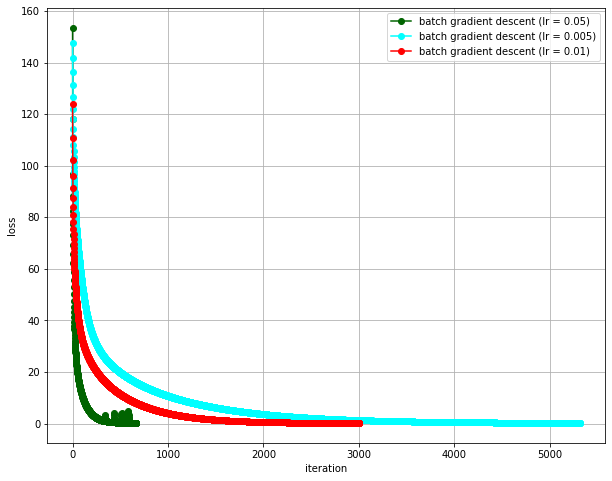

In [7]:
def predict(X,W,b):
    #Combine W and bias into one for ease of computation 
    W = np.insert(W,0,b,axis=0) 
    
    predict_scores = np.dot(X,W) #Nx10
    exp_predict_scores = np.exp(predict_scores) #Nx10
    sum_exp_scores = np.sum(exp_predict_scores,axis=1) #Nx1
    prediction = exp_predict_scores.T/sum_exp_scores.T #10xN
    prediction = np.argmax(prediction,axis=0) #1xN
    
    return prediction

# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print('learning rate =', learning_rate[i])
    
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    
    print("final F(W) loss=", loss_GD[len(loss_GD)-1])
    print("time=", start-end)
    
    #TODO
    prediction = predict(X_train,W,b) #1xN
    correct = 0
    for j in range(len(y_train)):
        if(prediction[j]==y_train[j]):
            correct +=1
    prec_train = correct/len(prediction) 
    print('training precision =', prec_train)

    #TODO
    prediction = predict(X_test,W,b)
    correct = 0
    for j in range(len(y_test)):
        if(prediction[j]==y_test[j]):
            correct +=1
    prec_test = correct/len(prediction) 
    print('test precision =', prec_test)
    
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [13]:
# 3.3 stochastic gradient descent (SGD) for Logistic regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    
    #TODO: initialization
    notstop = True
    epoch = 0
    loss = []
    W = np.random.randn(X.shape[1],10)
    
    #Random Shuffling of data
    #Combine X and Y into one so that we can shuffle rows
    data = np.insert(X,X.shape[1],y,axis=1)
    
    """
    np.random.shuffle(data)
    
    #Extract shuffled X and y back
    y = data[:,data.shape[1]-1]
    y = y.astype(int)
    X = np.delete(data,data.shape[1]-1, axis=1)    
    
    
    num_batches = int(X.shape[0]/batch_size)
    X = X[0:num_batches*batch_size,:] #Make X a multiple of batch size
    y = y[0:num_batches*batch_size] #Make y a multiple of batch size 
    """

    # optimization loop	
    while notstop and epoch < max_epoch:
        loss_epoch = 0
        
        np.random.shuffle(data)
    
        #Extract shuffled X and y back
        y = data[:,data.shape[1]-1]
        y = y.astype(int)
        X = np.delete(data,data.shape[1]-1, axis=1)    


        num_batches = int(X.shape[0]/batch_size)
        X = X[0:num_batches*batch_size,:] #Make X a multiple of batch size
        y = y[0:num_batches*batch_size] #Make y a multiple of batch size 

        #TODO: SGD of each epoch
        for b in range(num_batches):
            X_b = X[b*batch_size: (b+1)*batch_size, :]
            y_b = y[b*batch_size: (b+1)*batch_size]

            l,grad = get_loss_grad_opt(W,X_b,y_b,eta)
    

            loss_epoch += l
            W -= lr*grad

        loss_epoch /= num_batches
        loss.append(loss_epoch)
        
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= (loss[epoch] - eps):
                lr *= 0.5
                print('reduce learning rate to', lr)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if (loss[epoch - 20] <= (loss[epoch] - eps)) or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                break
            
        epoch += 1
        
    #TODO: W and b
    b = W[0,:]
    W = np.delete(W,0,0)

    return (W, b, loss)

---------------------------------------
batch_size = 10
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
Final loss F(W) = 0.23247298069196673
No of epochs= 88
time= 1.203125
training precision = 0.9851521900519673
test precision = 0.9733333333333334
---------------------------------------
batch_size = 50
Final loss F(W) = 0.24655793672199883
No of epochs= 157
time= 1.375
training precision = 0.9844097995545658
test precision = 0.9688888888888889
---------------------------------------
batch_size = 100
Final loss F(W) = 0.27081084969332037
No of epochs= 266
time= 5.234375
training precision = 0.9829250185597624
test precision = 0.9688888888888889


Text(0, 0.5, 'loss')

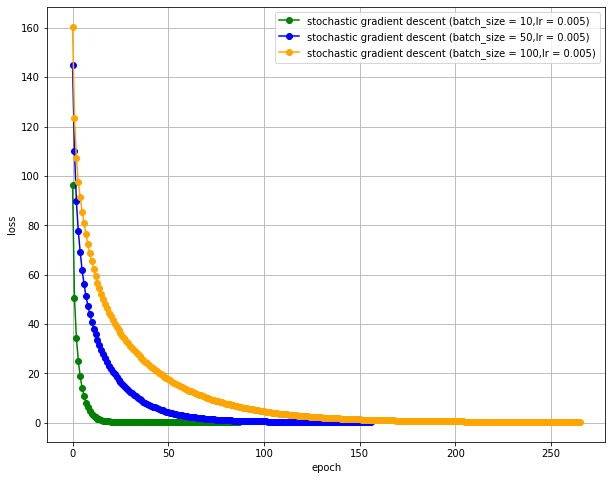

In [24]:
import time

# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
#lr = [0.01,0.01,0.01]
#lr = [0.1,0.1,0.1]
#lr = [0.001,0.001,0.001]
#lr = [0.005,0.005,0.005]

lr = [0.001,0.005,0.01]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    
    start=time.process_time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    end = time.process_time()
    
                   
    print("Final loss F(W) =",loss_SGD[len(loss_SGD)-1])
    print("No of epochs=",len(loss_SGD))
    print("time=", end-start)
    
    #TODO
    prediction = predict(X_train,W,b) #1xN
    correct = 0
    for j in range(len(y_train)):
        if(prediction[j]==y_train[j]):
            correct +=1
    prec_train = correct/len(prediction) 
    print('training precision =', prec_train)

    
    #TODO
    prediction = predict(X_test,W,b)
    correct = 0
    for j in range(len(y_test)):
        if(prediction[j]==y_test[j]):
            correct +=1
    prec_test = correct/len(prediction) 
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ',lr = ' + str(lr[i])+ ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')